In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
testing = pd.read_csv('/kaggle/input/titanic/test.csv')


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
training["Sex_num"] = training.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [7]:
training.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_num'],
      dtype='object')

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

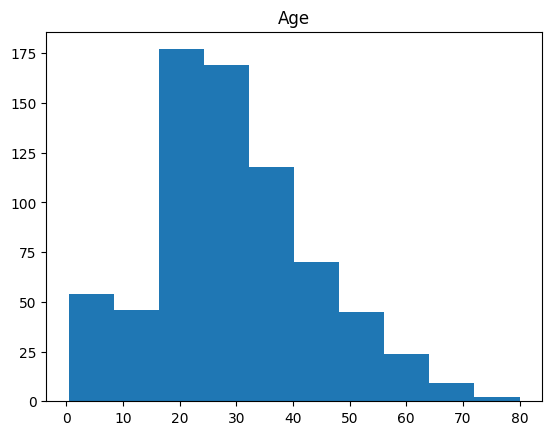

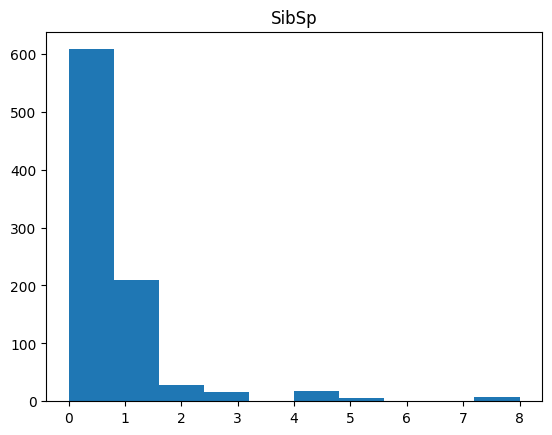

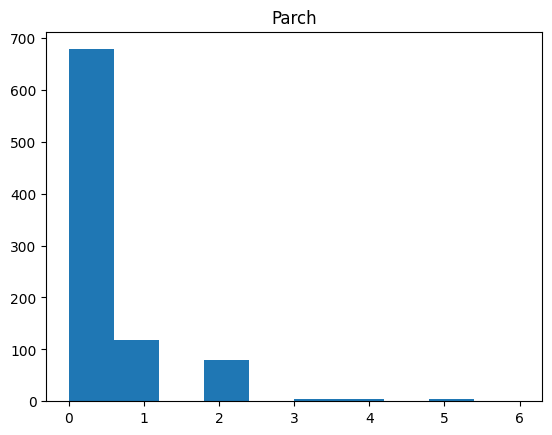

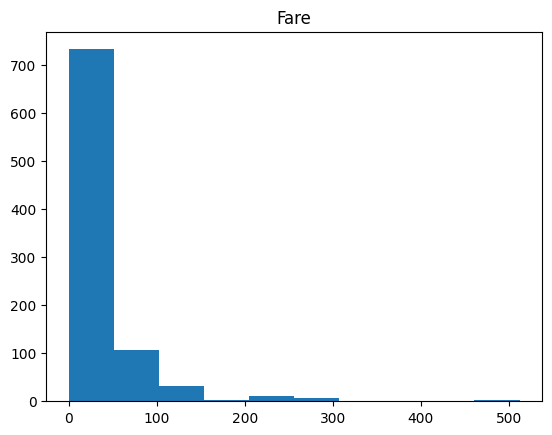

In [10]:
for i in df_num:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

<h1><b>need for normalisation of num_df columns</b></h1>

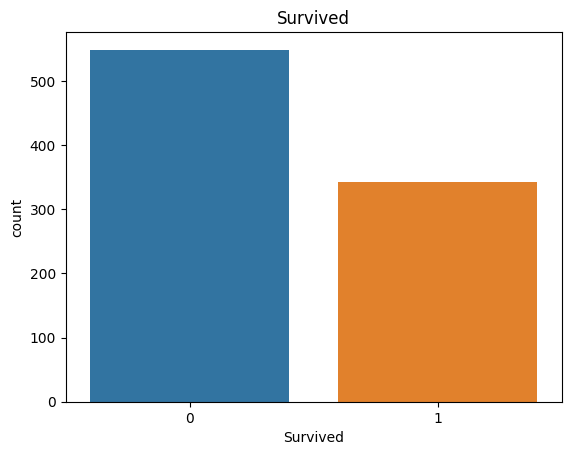

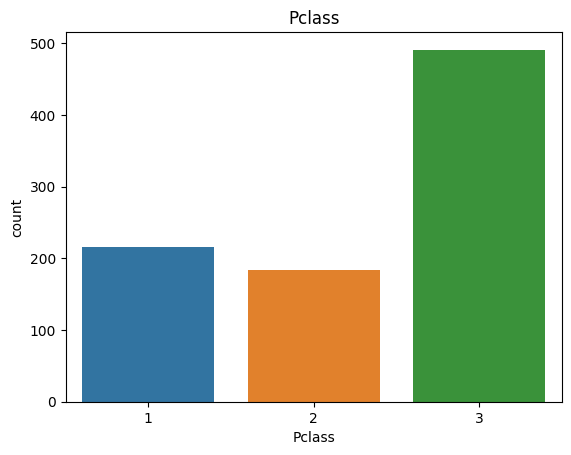

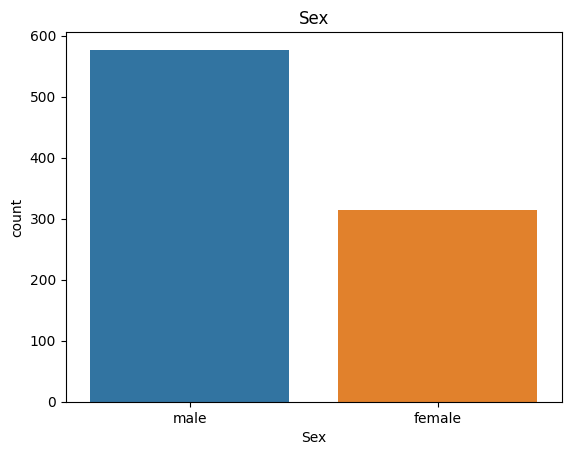

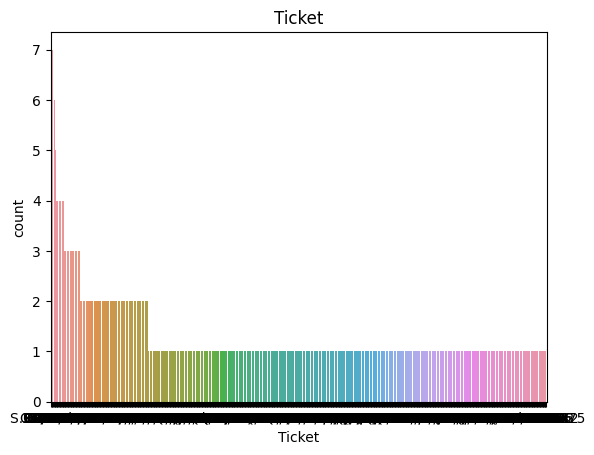

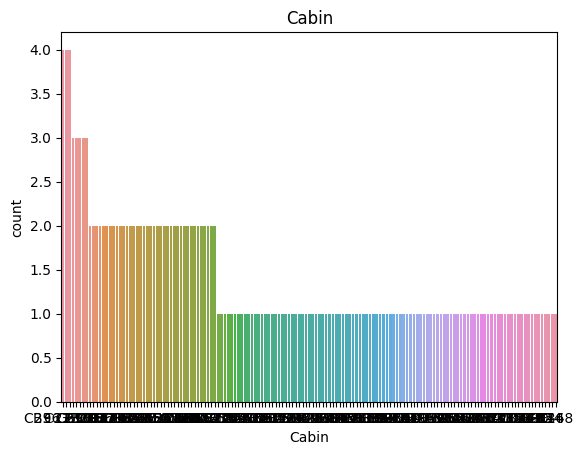

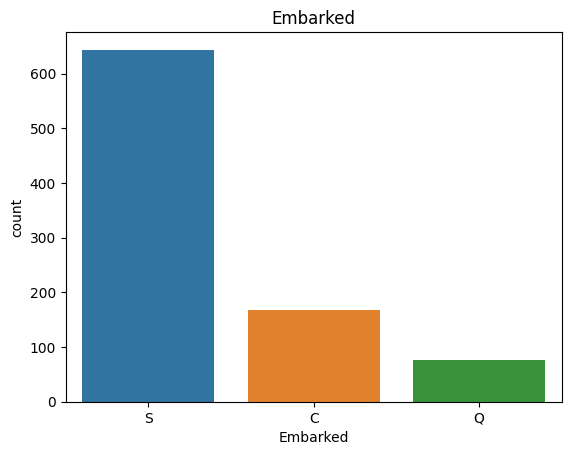

In [11]:
for i in df_cat.columns:
    sns.barplot(x = df_cat[i].value_counts().index,y = df_cat[i].value_counts())
    plt.title(i)
    plt.xticks(rotation = 0)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

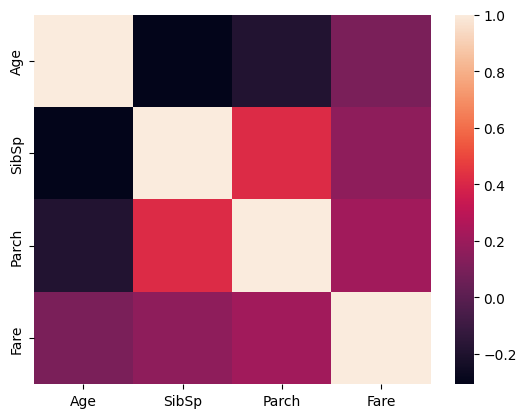

In [12]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [13]:
print(pd.pivot_table(df_cat, index = 'Survived', columns = 'Sex', aggfunc = 'count', values = 'Ticket'))
print()
print(pd.pivot_table(df_cat, index = 'Survived', columns = 'Pclass', aggfunc = 'count', values = 'Ticket'))
print()
print(pd.pivot_table(df_cat, index = 'Survived', columns = 'Embarked', aggfunc = 'count', values = 'Ticket'))
print()

Sex       female  male
Survived              
0             81   468
1            233   109

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217



In [14]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

In [15]:
pd.pivot_table(data = training, values = 'Ticket', columns='numeric_ticket', index = 'Survived', aggfunc = 'count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [16]:
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [17]:
training['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [18]:
training['test_train'] = 1;
testing['test_train'] = 0;
all_data = pd.concat([training, testing])
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_num',
       'numeric_ticket', 'name_title', 'test_train'],
      dtype='object')

In [19]:
all_data['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
all_data['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

all_data.dropna(subset = ['Embarked'], inplace = True)

all_data.Age = all_data.Age.fillna(training.Age.median())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

In [20]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1307 entries, 0 to 417
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     1307 non-null   int64  
 1   Survived        889 non-null    float64
 2   Pclass          1307 non-null   int64  
 3   Name            1307 non-null   object 
 4   Sex             1307 non-null   object 
 5   Age             1307 non-null   float64
 6   SibSp           1307 non-null   int64  
 7   Parch           1307 non-null   int64  
 8   Ticket          1307 non-null   object 
 9   Fare            1307 non-null   float64
 10  Cabin           293 non-null    object 
 11  Embarked        1307 non-null   object 
 12  Sex_num         889 non-null    float64
 13  numeric_ticket  1307 non-null   int64  
 14  name_title      1307 non-null   object 
 15  test_train      1307 non-null   int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 173.6+ KB


In [21]:
all_data.Pclass = all_data.Pclass.astype(str)
all_data.Parch = all_data.Parch.astype(str)

In [22]:
all_data['age_norm'] = np.log(all_data['Age'] + 1)
all_data['fare_norm'] = np.log(all_data['Fare'] + 1)

In [23]:
dummies = pd.get_dummies(all_data[['fare_norm','age_norm','Pclass', 'Parch', 'Sex', 'name_title', 'SibSp', 'Embarked', 'numeric_ticket', 'test_train']])
x_train = dummies[dummies['test_train'] == 1].drop(['test_train'], axis = 1)
x_test = dummies[dummies['test_train'] == 0].drop(['test_train'], axis = 1)
y_train = all_data[all_data['test_train'] == 1].Survived
y_train.shape

(889,)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import tree

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
dummies_scaled = dummies.copy()
dummies_scaled[['age_norm', 'fare_norm', 'SibSp']] = scale.fit_transform(dummies_scaled[['age_norm', 'fare_norm', 'SibSp']])

x_train_scaled = dummies_scaled[dummies_scaled.test_train == 1].drop(['test_train'], axis =1)
x_test_scaled = dummies_scaled[dummies_scaled.test_train == 0].drop(['test_train'], axis =1)

y_train = all_data[all_data.test_train==1].Survived


In [26]:
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fare_norm                889 non-null    float64
 1   age_norm                 889 non-null    float64
 2   SibSp                    889 non-null    float64
 3   numeric_ticket           889 non-null    int64  
 4   Pclass_1                 889 non-null    bool   
 5   Pclass_2                 889 non-null    bool   
 6   Pclass_3                 889 non-null    bool   
 7   Parch_0                  889 non-null    bool   
 8   Parch_1                  889 non-null    bool   
 9   Parch_2                  889 non-null    bool   
 10  Parch_3                  889 non-null    bool   
 11  Parch_4                  889 non-null    bool   
 12  Parch_5                  889 non-null    bool   
 13  Parch_6                  889 non-null    bool   
 14  Parch_9                  889 no

In [27]:
g = GaussianNB() 
cv = cross_val_score(g, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78651685 0.80337079 0.39325843 0.73033708 0.83615819]
0.7099282676315622


In [28]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82022472 0.81460674 0.79775281 0.79213483 0.85875706]
0.8166952326540976


In [29]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())
dt.fit(x_train_scaled, y_train)

[0.76404494 0.76966292 0.83707865 0.74719101 0.75706215]
0.7750079349965086


DecisionTreeClassifier(random_state=1)

[Text(0.45465515525477707, 0.9722222222222222, 'x[28] <= 0.5\ngini = 0.472\nsamples = 889\nvalue = [549, 340]'),
 Text(0.18963972929936307, 0.9166666666666666, 'x[6] <= 0.5\ngini = 0.423\nsamples = 372\nvalue = [113, 259]'),
 Text(0.08200636942675159, 0.8611111111111112, 'x[31] <= 0.5\ngini = 0.211\nsamples = 200\nvalue = [24, 176]'),
 Text(0.07563694267515923, 0.8055555555555556, 'x[16] <= 0.5\ngini = 0.168\nsamples = 194\nvalue = [18, 176]'),
 Text(0.052547770700636945, 0.75, 'x[1] <= -3.402\ngini = 0.101\nsamples = 168\nvalue = [9, 159]'),
 Text(0.03503184713375796, 0.6944444444444444, 'x[0] <= 1.225\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.028662420382165606, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.041401273885350316, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.07006369426751592, 0.6944444444444444, 'x[0] <= 0.434\ngini = 0.092\nsamples = 166\nvalue = [8, 158]'),
 Text(0.054140127388535034, 0.6388888888888888, '

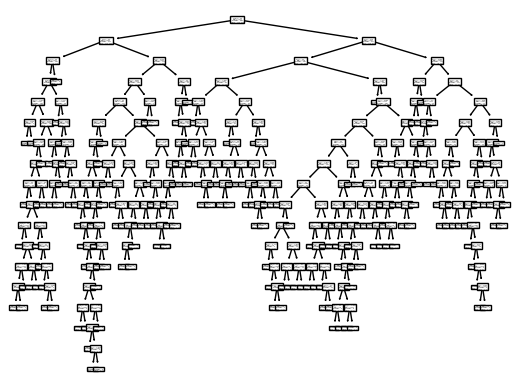

In [30]:
tree.plot_tree(dt)

In [31]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80337079 0.76966292 0.84269663 0.79775281 0.84745763]
0.812188154637212


In [32]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79213483 0.78089888 0.84831461 0.75280899 0.8079096 ]
0.7964133815781121


In [33]:
svc = SVC(probability = True)
cv = cross_val_score(rf,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.79213483 0.78089888 0.84831461 0.75280899 0.8079096 ]
0.7964133815781121


In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.83146067 0.80898876 0.87078652 0.78089888 0.81920904]
0.8222687742017394


In [35]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr', lr), ('knn', knn), ('g', g), ('svc', svc), ('xgb', xgb)], voting = 'soft')

In [36]:
cv = cross_val_score(voting_clf,x_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.80898876 0.83707865 0.79775281 0.86440678]
0.8324319177299563


In [37]:
import pandas as pd

In [38]:
voting_clf.fit(x_train_scaled, y_train)
y_hat_base = voting_clf.predict(x_test_scaled).astype(int)


In [39]:
y_hat_base

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [40]:
basic_submission = {'PassengerId':testing.PassengerId, 'Survived': y_hat_base}
base_submission = pd.DataFrame(data = basic_submission)
base_submission.to_csv('base_submission1.csv', index = False)